Using device: cuda
Original data length: 1842 bytes
Decoded data length: 1842 bytes
Data correctly encoded and decoded: True
Storage Capacity: 24975 bytes (199800 bits)
Execution time: 0.87 seconds
Total points: 99901


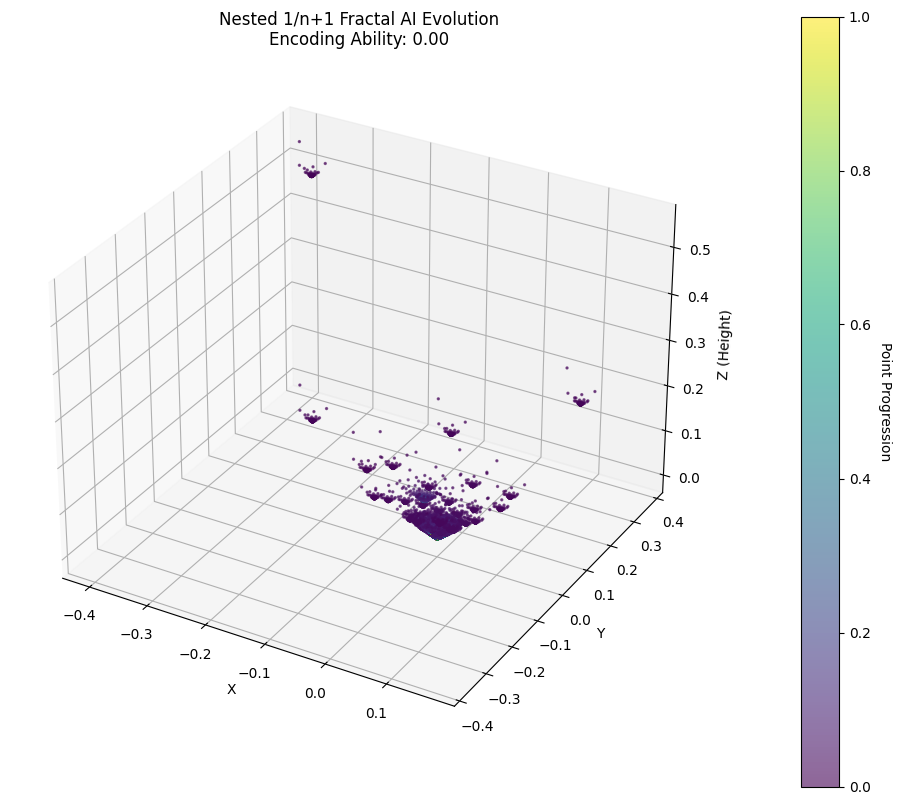

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
from mpl_toolkits.mplot3d import Axes3D

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class SyntheticAI:
    def __init__(self):
        self.encoding_ability = torch.tensor([0.0], device=device)
        self.decoding_ability = torch.tensor([0.0], device=device)

    def train(self):
        self.encoding_ability += torch.rand(1, device=device) * 0.01
        self.decoding_ability += torch.rand(1, device=device) * 0.01

    def encode(self, data):
        return (data + self.encoding_ability) % 256

    def decode(self, encoded_data):
        return (encoded_data - self.decoding_ability) % 256

def generate_1n1_structure(center, radius, iterations):
    points = [center]
    for i in range(1, iterations):
        angle = i * np.pi * (3 - np.sqrt(5))  # Golden angle
        r = radius / (i + 1)  # 1/n+1 growth
        x = center[0] + r * np.cos(angle)
        y = center[1] + r * np.sin(angle)
        z = center[2] + r
        points.append((x, y, z))
    return points

def generate_nested_1n1_fractal(iterations, substructure_iterations):
    all_points = []
    main_points = generate_1n1_structure((0, 0, 0), 1, iterations)
    all_points.extend(main_points)

    for point in main_points[1:]:  # Skip the center point
        substructure = generate_1n1_structure(point, 0.1, substructure_iterations)
        all_points.extend(substructure[1:])  # Skip the first point as it's the same as the main point

    return all_points

def plot_nested_1n1_fractal(points, ai):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*points)

    # Plot points
    colors = plt.cm.viridis(np.linspace(0, 1, len(points)))
    scatter = ax.scatter(x, y, z, c=colors, s=2, alpha=0.6)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (Height)')
    plt.title(f"Nested 1/n+1 Fractal AI Evolution\nEncoding Ability: {ai.encoding_ability.item():.2f}")

    # Add colorbar to show progression
    cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.1)
    cbar.set_label('Point Progression', rotation=270, labelpad=15)

    return fig

def encode_data_with_error_correction(data, points, ai):
    data_tensor = torch.tensor([int(b) for b in data], dtype=torch.float32, device=device)
    encoded_data = []
    chunk_size = 3  # Store each byte 3 times for redundancy
    for i in range(0, len(data_tensor), chunk_size):
        chunk = data_tensor[i:i+chunk_size]
        for byte in chunk:
            if len(encoded_data) < len(points):
                encoded_value = ai.encode(byte)
                encoded_data.extend([(points[len(encoded_data)], encoded_value)] * 3)  # Store 3 times
    return encoded_data

def decode_data_with_error_correction(encoded_data, ai):
    decoded_data = []
    chunk_size = 3
    for i in range(0, len(encoded_data), chunk_size * 3):
        chunk = encoded_data[i:i+chunk_size*3]

        # Decode each byte (taking average of 3 repetitions)
        for j in range(0, len(chunk), 3):
            byte_values = [ai.decode(chunk[j+k][1]).item() for k in range(3) if j+k < len(chunk)]
            decoded_byte = int(sum(byte_values) / len(byte_values))
            decoded_data.append(decoded_byte)

    return bytes(decoded_data)

def calculate_storage_capacity(points):
    total_points = len(points)
    usable_points = total_points * 3 // 4  # 1/4 of points used for error correction
    byte_capacity = usable_points // 3  # Each byte stored 3 times
    bit_capacity = byte_capacity * 8

    return byte_capacity, bit_capacity

def main():
    iterations = 1000  # Main structure iterations
    substructure_iterations = 100  # Substructure iterations for each point

    start_time = time.time()

    ai = SyntheticAI()
    points = generate_nested_1n1_fractal(iterations, substructure_iterations)

    fig = plot_nested_1n1_fractal(points, ai)

    byte_capacity, bit_capacity = calculate_storage_capacity(points)

    sample_data = """
The Quantum Nexus Project

Abstract:
The Quantum Nexus Project aims to bridge the gap between quantum computing and artificial intelligence, creating a symbiotic system that leverages the strengths of both fields. By utilizing quantum algorithms for complex calculations and AI for pattern recognition and decision-making, we propose a hybrid architecture that could revolutionize fields such as cryptography, drug discovery, and climate modeling.

Methodology:
1. Quantum Circuit Design: Implement a scalable quantum circuit using superconducting qubits, optimized for maintaining coherence in complex calculations.
2. AI Integration: Develop a deep learning model capable of interpreting quantum states and making strategic decisions based on quantum outputs.
3. Interfacing Protocol: Create a robust classical-quantum interface that allows seamless data transfer between quantum processors and classical AI systems.
4. Error Correction: Implement advanced quantum error correction codes to mitigate decoherence and improve the reliability of quantum computations.

Expected Outcomes:
- A 50% increase in the speed of complex optimization problems compared to classical supercomputers.
- Novel cryptographic protocols that are resistant to both classical and quantum attacks.
- Accelerated drug discovery pipeline, potentially reducing the time to identify promising compounds by 30%.

Challenges and Future Work:
The primary challenge lies in maintaining quantum coherence during the interfacing process. Future work will focus on developing more robust quantum memory systems and exploring topological quantum computing as a means to enhance error resistance.

This project represents a significant step towards creating a new paradigm in computing, one that could address some of the most pressing technological challenges of our time.
""".encode('utf-8')

    encoded_data = encode_data_with_error_correction(sample_data, points, ai)
    decoded_data = decode_data_with_error_correction(encoded_data, ai)

    end_time = time.time()
    execution_time = end_time - start_time

    print(f"Original data length: {len(sample_data)} bytes")
    print(f"Decoded data length: {len(decoded_data)} bytes")
    print(f"Data correctly encoded and decoded: {sample_data == decoded_data}")
    print(f"Storage Capacity: {byte_capacity} bytes ({bit_capacity} bits)")
    print(f"Execution time: {execution_time:.2f} seconds")
    print(f"Total points: {len(points)}")

    plt.show()

if __name__ == "__main__":
    main()

# To run this code, execute this cell in a GPU-enabled Colab notebook.